# COGS 108 - Final Project 

# Overview

In this project, I intended to identify the relationship between yelp reviews and yelp ratings and health inspection scores. I looked at a dataset of restaurant health inspections and yelp reviews for restaurants located in North Carolina. From this analysis, I found a negative correlation, both between the number of yelp reviews and health inspection scores, and yelp ratings and health inspection scores. The data seems to suggest that higher yelp ratings are correlated with lower inspection scores and more yelp reviews are correlated with a lower inspection score.

# Name & GitHub

- Name: Michele Murakami
- GitHub Username: michelemurakami

# Research Question

What is the relationship between health inspection scores and yelp ratings and number of yelp reviews? For this data analysis, we will specifically be looking at restaurants in North Carolina.

## Background and Prior Work

Restaurants are required to have routine, regular inspections to ensure they are complying with the state and local law to prevent food related illnesses. Although inspections and grading systems differ across different states and counties, they generally include a routine and unannounced inspections by specialists to ensure food is stored, handled, and distributed in sanitary conditions (1)(5). 

In North Carolina, restaurants are grades by points. A certain number of points are subtracted when the establishment has violated a section of the NC Food Code. Different violations have different point values, so more critical health violations are assigned higher point values. After points based on violations are subtracted from the 100 points possible, the restaurant is assigned a letter grade based on the percentage of the points remaining. A restaurant with a score of 90% or above receives an A, 80% or above recieves a B, and 70% or above recieves a C. Permits are revoked for scoring below 70% (3). 

But some view these health inspections as insufficient for checking restaurants' food serving conditions. With so many restaurants, and new ones popping up, health inspection might not occur as frequently as needed. As a result, people have considered online reviews as an addition to evaluating restaurant's hygiene. Yelp is a popular restaurant review site, where users are able to rate restaurants on a five star scale and write reviews in the comment secton. This creates a platform for users to be able to identify possible health code violations by writing a review or giving a restaurant a low star rating. A study looked at New York City restaurants' online yelp reviews and health inspections, and found that online reviews can help identify restaurants at risk for health code violations (4). Furthermore, other studies and data science projects have been conducted to analyze the relationship between health inspection data and yelp ratings. One research study(6) built a model from yelp data and health inspection records to predict restaurant inspections scores 82% of the time(2).


References (include links):

1)http://ncagr.gov/fooddrug/food/inspections.htm 

2)https://blog.yelp.com/2015/06/data-science-challenge-predict-restaurant-health-scores-with-yelp-data#:~:text=A%20research%20study%20by%20Professor,inspection%20scores%20for%20restaurants%2082

3)https://ehs.ncpublichealth.com/faf/docs/foodprot/15A-NCAC-18A-2600-FINAL.pdf

4)https://phys.org/news/2020-01-customer-health-good-hygiene-restaurants.html

5)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/#:~:text=Restaurants%20in%20the%20United%20States%20are%20regularly%20inspected%20by%20local,foodborne%20disease%E2%80%9D%20(4).

6)https://homes.cs.washington.edu/~yejin/Papers/emnlp13_hygiene.pdf

# Hypothesis


I hypothesize that restaurants that have a higher yelp rating will have higher health inspection scores, but restaurants with more reviews will have a lower health inspection score. Restaurants that are cleaner and comply with their county's food safety policies are more likely to get returning constumer and more likely to have people rate their restaurant with 4 or 5 stars. Therefore, clean restaurants are probably less likely to get negative reviews related lack of cleanliness or reported cases of food poisoning. As a result, they might not have as many people reviewing their restaurant on yelp leading to high yelp ratings, but not as many customer reviews. On the other hand, restaurants that are unclean or have unsanitary work environments are probably going to get more negative reviews online from unhappy customers. 

# Dataset(s)

The ideal dataset for yelp information would include information on a restaurants' yelp ratings, number of yelp reviews, and the list of reviews and comments. The ideal dataset for health inspection would include points assigned to the restaurant out of 100, the name of restaurant, the number of inspections, the date between their last inspection, the number of violations, the list of violations, the number of recorded customer complaints, the date restaurant opened, and previous scores recieved.

And ideally we would want yelp data and health inspection data nationally, so we would be able to our analysis to the entire United States. We would also want information on how health inspections differ across counties and states, to be able to standardize the health inspection scores. However, due to the time constraints and limitations of this project, I am limiting my scope to restaurants in an area of North Carolina and the dataset provided. 

All three of the following datasets were provided by the instructor for the final project. Because of this, I have not provided a link for the dataset.

Dataset 1:
- Dataset Name: Yelp
- Link to the dataset: no link dataset was provided 
- Number of observations: 3688 observations

This dataset provides information on the yelp ratings and general information such as location and type of food served for restaurants in North Carolina.


Dataset 2:
- Dataset Name: Inspections
- Link to the dataset: no link dataset was provided 
- Number of observations: 18466 observations

This dataset provides information on health inspections conducted on restaurants in North Carolina.


Dataset 3:
- Dataset Name: Violations
- Link to the dataset: no link dataset was provided 
- Number of observations: 189802 observations

This dataset provides information and descriptions on the specific health code violations committed by restaurants in North Carolina.

I plan to merge all three datasets into one dataframe sorted by hsisid and inspection date to show the relationship between the yelp ratings and health inspection information. Using hsisid and inspection dates, I'll group violations and match them with inspection data. Next, I'll use address and restaurant names to match the health inspection data with the yelp dataset.

# Setup

In [1]:
!pip install statsmodels

#import libraries needed for project
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import patsy
import statsmodels.api as sm

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

# Data Cleaning

Remove columns not needed for analysis and merge datasets to make it easier to analyze

In [2]:
#loads the datasets used for analysis
inspect_df = pd.read_csv('data/inspections.csv')
violation_df = pd.read_csv('data/violations.csv')
yelp_df = pd.read_csv('data/yelp.csv')

### Cutting Down Data

To make the dataset more manageable I dropped the columns with information I won't be using. For the violation and inspection datasets, I dropped data  identifying inspectors. In the inspection and violation dataset, I had to drop some of the columns because I didn't understand what they were for. This is another limitation of this analysis because they could have potentially been applicable for this project. 

In [3]:
yelp_df = yelp_df.drop(["id", "is_closed", "latitude", "longitude", 
              "phone", "price", "hotdogs", "sandwiches", "pizza", 
              "tradamerican", "burgers", "mexican", 
              "grocery", "breakfast_brunch", "coffee",
              "chinese", "italian", "newamerican", 
              "chicken_wings", "delis", "bars", "salad", 
              "seafood", "bbq", "bakeries", "sushi"], axis=1)

In [4]:
inspect_df = inspect_df.drop(["address2", "city", "phonenumber", "postalcode", 
                 "x", "y", "type", "inspectedby", 
                 "inspector_id", "geocodestatus", "inspection_num", 
                 "num_non_critical", "num_critical_previous", 
                 "num_non_critical_previous", 
                 "num_critical_mean_previous", 
                 "num_non_critical_mean_previous", 
                 "avg_neighbor_num_critical", 
                 "avg_neighbor_num_non_critical", "top_match", 
                 "second_match", "facilitytype", "state", 
                 "previous_inspection_by_same_inspector", 
                 "num_critical", "critical", "restaurantopendate",
                 "previous_inspection_date", 
                 "days_since_previous_inspection",
                 "description"], axis=1)

In [5]:
violation_df = violation_df.drop(["X.objectid", "questionno", 
                   "inspectedby", "observationtype",
                   "count", "violationtype",
                   "statecode", "cdcriskfactor",
                   "cdcdataitem"], axis=1)

### Merging Dataframes
After dropping the columns that were not needed for the analysis I edited the inspection dataset and violations dataset to allow me to merge the two dataset. I renamed the merged dataset that resulted from the two datasets to health_df.

In [6]:
#rename date column to enable merge
inspect_df.rename(columns={'date':'inspectdate'}, inplace=True)

#edit inspect date to exclude unnecessary information
violation_df['inspectdate'] = violation_df['inspectdate'].str.replace('T00:00:00.000Z', '')
inspect_df['inspectdate'] = inspect_df['inspectdate'].str.replace('T00:00:00Z', '')

#merge inspection dataset and violation dataset based on hsisid and inspectdate into one dataset
health_df = pd.merge(inspect_df, violation_df, on=["hsisid", "inspectdate"])

health_df

,hsisid,inspectdate,name,address1,days_from_open_date,zip,score,category,critical,violationcode,severity,shortdesc,comments,pointvalue
0,4092013748,2012-09-21,Cafe 3000 At Wake Med,3000 New Bern Ave,3562,27610,96.0,Conformance with Approved Procedures,No,8-201.13,Core,"Compliance with variance, specialized process,...",Raw fish is used for sushi (sushi chef not pre...,0
1,4092013748,2012-09-21,Cafe 3000 At Wake Med,3000 New Bern Ave,3562,27610,96.0,Employee Health,Yes,2-201.11(A),Priority,"Management, employees knowledge; responsibilit...",Employee health policy may not include require...,0
2,4092013748,2012-09-21,Cafe 3000 At Wake Med,3000 New Bern Ave,3562,27610,96.0,Physical Facilities,NaN,5-203.14,NaN,Plumbing installed; proper backflow devices,Spray nozzle hangs below flood rim of prewash ...,0
3,4092013748,2012-09-21,Cafe 3000 At Wake Med,3000 New Bern Ave,3562,27610,96.0,Potentially Hazardous Food Time/Temperature,Yes,3-501.16(A)(1),Priority,Proper hot holding temperatures,Potentially hazardous foods on hot bar were no...,1
4,4092013748,2012-09-21,Cafe 3000 At Wake Med,3000 New Bern Ave,3562,27610,96.0,Potentially Hazardous Food Time/Temperature,Yes,3-501.16(A)(2)(B),Priority,Proper cold holding temperatures,Potentially hazardous foods on salad bar and G...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149503,4092300225,2016-11-03,LA CAMPANA MARKET,1701 N ARENDELL AVE,4235,27597,93.0,Protection from Contamination,Yes,4-501.114,Priority,Food-contact surfaces: cleaned & sanitized,4-501.114; Priority; Sanitizer was not made up...,1
149504,4092300225,2016-11-03,LA CAMPANA MARKET,1701 N ARENDELL AVE,4235,27597,93.0,Supervision,No,2-102.12,Core,"PIC present, Demonstration - Certification by ...",2-102.12; Core; The manager on duty did not ha...,2
149505,4092300225,2016-11-03,LA CAMPANA MARKET,1701 N ARENDELL AVE,4235,27597,93.0,Utensils and Equipment,No,4-601.11(B)(C),Core,Non-food contact surfaces clean,4-601.11(B) and (C); Core; Old food debris was...,0
149506,4092300225,2016-11-03,LA CAMPANA MARKET,1701 N ARENDELL AVE,4235,27597,93.0,Utensils and Equipment,No,4-501.12,Core,"Equipment, food & non-food-contact surfaces ap...",4-501.12; Core; Cutting boards shall be resurf...,0


After creating the dataframe that includes both the violation dataset and inspection dataset, I merged the health_df with the yelp dataset, so I can more easily compare health inspections data to yelp ratings.

In [7]:
#rename zipcode column to enable merge
health_df.rename(columns={'zip':'zip_code'}, inplace=True)

#create dataframe that has information about health inspections and yelp reviews
all_df = pd.merge(health_df, yelp_df, on=["address1", "zip_code"])

all_df

,hsisid,inspectdate,name_x,address1,days_from_open_date,zip_code,score,category,critical,violationcode,severity,shortdesc,comments,pointvalue,name_y,rating,review_count
0,4092300210,2012-09-25,International Foods,2215 New Hope Church Rd,3659,27604,97.5,Physical Facilities,No,6-202.11,Core,Meets ventilation & lighting requirements; de...,The light bulbs in the glass front display ref...,0,international foods,3.5,6
1,4092300210,2012-09-25,International Foods,2215 New Hope Church Rd,3659,27604,97.5,Proper Use of Utensils,No,4-903.11(A)(B),Core,"Utensils, equipment & linens: properly stored,...",Knife racks and hangers being used to store cl...,0,international foods,3.5,6
2,4092300210,2012-09-25,International Foods,2215 New Hope Church Rd,3659,27604,97.5,Employee Health,NaN,"2-201.11(A),(B),(C), (E)",NaN,"Management, employees knowledge; responsibilit...",Approved employee health plan was not used. *N...,0,international foods,3.5,6
3,4092300210,2012-09-25,International Foods,2215 New Hope Church Rd,3659,27604,97.5,Utensils and Equipment,No,4-205.10,Core,"Equipment, food & non-food-contact surfaces ap...",The plastic milk crates that were being used a...,0,international foods,3.5,6
4,4092300210,2012-09-25,International Foods,2215 New Hope Church Rd,3659,27604,97.5,Prevention of Food Contamination,No,3-304.14,Core,Wiping cloths: properly used & stored,Wiping cloths were stored on prep tables betwe...,0,international foods,3.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,4092016715,2015-08-07,Spring Hill Suites Kitchen,1128 Ledsome Lane,392,27511,97.5,Prevention of Food Contamination,Yes,3-306.11,Priority,Contamination prevented during food preparatio...,3-306.11; The condiments for the oat meal and...,1,springhill suites raleigh cary,4.0,10
18985,4092016715,2015-08-07,Spring Hill Suites Kitchen,1128 Ledsome Lane,392,27511,97.5,Proper Use of Utensils,No,4-904.11,Core,"Utensils, equipment & linens: properly stored,...",4-904.11; The cups should be in a dispenser so...,0,springhill suites raleigh cary,4.0,10
18986,4092016715,2015-08-07,Spring Hill Suites Kitchen,1128 Ledsome Lane,392,27511,97.5,Good Hygienic Practices,No,2-401.11,Core,"Proper eating, tasting, drinking, or tobacco use",2-401.11 (B)There were two coffee cups on the ...,1,springhill suites raleigh cary,4.0,10
18987,4092016715,2016-04-22,Spring Hill Suites Kitchen,1128 Ledsome Lane,651,27511,98.5,Prevention of Food Contamination,Yes,3-306.11,Priority,Contamination prevented during food preparatio...,3-306.11; The condiments for the oat meal and...,1,springhill suites raleigh cary,4.0,10


### Clean up data

Before starting to analyze the data, I needed to change the column header to clearer titles and remove redundant or unimportant information. I got rid of the columns related to location because I only needed them initially to merge the two datasets. Now that I was able to match the two datasets by matching the ids and addresses, I can drop columns related to locations.

In [8]:
#get rid of one of columns not needed for analysis
all_df = all_df.drop(["name_x", "address1", "zip_code"], axis=1)

In [9]:
#rename columns
all_df.rename(columns={'hsisid':'id'}, inplace=True)
all_df.rename(columns={'inspectdate':'date of inspection'}, inplace=True)
all_df.rename(columns={'days_from_open_date':'days open'}, inplace=True)
all_df.rename(columns={'score':'inspection score'}, inplace=True)
all_df.rename(columns={'category':'category of violation'}, inplace=True)
all_df.rename(columns={'critical':'critical violation?'}, inplace=True)
all_df.rename(columns={'violationcode':'violation code'}, inplace=True)
all_df.rename(columns={'shortdesc':'description'}, inplace=True)
all_df.rename(columns={'pointvalue':'point value of violation'}, inplace=True)
all_df.rename(columns={'name_y':'name'}, inplace=True)
all_df.rename(columns={'rating':'yelp rating'}, inplace=True)
all_df.rename(columns={'review_count':'number of yelp reviews'}, inplace=True)

#reorder columns
all_df = all_df[['id', 'name', 'yelp rating', 'number of yelp reviews', 
        'inspection score', 'category of violation', 'critical violation?', 
        'violation code', 'severity', 'point value of violation', 'description', 
        'comments', 'days open', 'date of inspection']]

#drop rows with NaN data
all_df = all_df.dropna()

I tried to change the titles to be as clear as possible, but there might be some columns with ambiguous names, so I'll try to clarify their meanings here. First of all, all_df is arranged by violations sorted together by hsisid, renamed to be id. The id is the health inspection assigned identifying number for the restaurant. Therefore, multiple rows that have the same id are the same restaurant's different violations. The critical violation? is a column that indicates if that specific violation is critical or not. The severity is which violation type that violation is. There are three: core, priority, and priority foundation. Core are items related to general sanitation, operational controls, operating procedures, facilities, structures, equipment, and general maintenance. Priority items are related to eliminating, or taking steps to reduce hazards of foodborne illnesses. Priority foundation are related to equipment, training, and documentation to prevent foodbourne illnesses. Info from: http://transylvaniahealth.org/wp-content/uploads/2015/10/NC-Food-Code-Manual-2009-FINAL.pdf. Point value of violation is the amount of points that will be subtracted due to that violation. Description is the general comments from the inspection, while comments is specific to that violation. 

In [10]:
#creates a column to count the number of violations per restaurant
all_df['violation count'] = 1

#function to convert yes to 1 and no to 0 
def convert_label(label):
    if (label == 'Yes' or label == 'yes'):
        return float(1.0)
    elif (label == 'No' or label == 'no'):
        return float(0.0)
    else: 
        return label

#convert critical violations column to 1s and 0s
all_df['critical violation?'] = all_df['critical violation?'].apply(convert_label)

In [11]:
#create dataframe with number of violations per restaurant 
#by grouping restaurant by id and date of inspection
agg_function = {'id':'first', 'name':'first', 'yelp rating':'first', 
                'number of yelp reviews':'first', 'inspection score':'first', 
                'critical violation?':'sum', 'days open':'first', 
                'violation count':'sum'}

restaurant_df = all_df.sort_values('date of inspection').groupby(['id', 'date of inspection']).aggregate(agg_function)

restaurant_df

id                       name  \
id         date of inspection                                          
4092010037 2013-05-14          4092010037  aubreys and peedies grill   
           2014-01-09          4092010037  aubreys and peedies grill   
           2014-09-05          4092010037  aubreys and peedies grill   
           2015-06-26          4092010037  aubreys and peedies grill   
           2016-03-21          4092010037  aubreys and peedies grill   
...                                   ...                        ...   
4092300221 2014-05-06          4092300221              la zacatecana   
           2014-11-19          4092300221              la zacatecana   
           2015-04-08          4092300221              la zacatecana   
           2015-09-18          4092300221              la zacatecana   
           2016-02-05          4092300221              la zacatecana   

                               yelp rating  number of yelp reviews  \
id         date of inspection                                        
4092010037 2013-05-14                  4.5                      10   
           2014-01-09                  4.5                      10   
           2014-09-05                  4.5                      10   
           2015-06-26                  4.5                      10   
           2016-03-21                  4.5                      10   
...                                    ...                     ...   
4092300221 2014-05-06                  4.5                       3   
           2014-11-19                  4.5                       3   
           2015-04-08                  4.5                       3   
           2015-09-18                  4.5                       3   
           2016-02-05                  4.5                       3   

                               inspection score  critical violation?  \
id         date of inspection                                          
4092010037 2013-05-14                      98.0                  3.0   
           2014-01-09                      96.0                  4.0   
           2014-09-05                      95.5                  2.0   
           2015-06-26                      96.0                  2.0   
           2016-03-21                      96.5                  1.0   
...                                         ...                  ...   
4092300221 2014-05-06                      93.0                  9.0   
           2014-11-19                      92.5                  4.0   
           2015-04-08                      95.0                  1.0   
           2015-09-18                      94.0                  2.0   
           2016-02-05                      98.0                  0.0   

                               days open  violation count  
id         date of inspection                              
4092010037 2013-05-14               8055               12  
           2014-01-09               8295                8  
           2014-09-05               8534                7  
           2015-06-26               8828                8  
           2016-03-21               9097                6  
...                                  ...              ...  
4092300221 2014-05-06               3606               13  
           2014-11-19               3803               11  
           2015-04-08               3943                7  
           2015-09-18               4106                7  
           2016-02-05               4246                3  

[914 rows x 8 columns]

The above data list the restaurants and the count of violations per inspections. Since there are several inspections per restaurant, we can't just add up all the violation counts because restaurant that have been around longer would probably have more inspection and violation counts. Instead, I am going to just take the data for the most recent inspection and use that dataset for the analysis. 

In [12]:
#create a dataframe with the most recent inspection data
recent_df = restaurant_df.sort_values(by='date of inspection').drop_duplicates(subset=['id'], keep='last')

#drop repeated id column
recent_df = recent_df.drop(recent_df.columns[0], axis=1)

#rename critical violation? column to be more descriptive
recent_df.rename(columns={'critical violation?':'number of critical'}, inplace=True)

recent_df

,,name,yelp rating,number of yelp reviews,inspection score,number of critical,days open,violation count
id,date of inspection,,,,,,,
4092021200,2015-06-26,thomas e brooks park,4.5,4,98.5,0.0,4386,3
4092030175,2015-11-23,don beto el poblano,5.0,2,87.0,8.0,3076,15
4092014015,2015-11-25,third place coffee house,4.0,71,93.0,4.0,4255,11
4092012172,2015-12-29,courtney's restaurant,3.0,57,96.0,4.0,6601,9
4092014315,2015-12-29,mcdonalds,3.0,1,96.0,9.0,3889,18
...,...,...,...,...,...,...,...,...
4092021196,2016-10-18,harris teeter,3.5,21,97.0,3.0,4865,7
4092010795,2016-10-19,watkins grill,4.0,40,94.0,1.0,9303,8
4092012067,2016-10-21,kabuki japanese house of steak,2.5,79,85.5,10.0,7057,18


Before analyzing the data I want to check if there are any unexpected values. 

In [13]:
#count number of unique names
len(recent_df['name'].unique())
#result of 94 seems reasonable since there may be restaurants with same names

#check yelp rating values are between 1-5
print(all(i >= 0 and i <= 5 for i in recent_df['yelp rating'].unique()))
#values are all in correct range

#check if all are positive numbers
print(all(i >= 0 for i in recent_df['number of yelp reviews'].unique()))

#check if all are 100 or less
print(all(i <= 100 for i in recent_df['inspection score'].unique()))


True
True
True


# Data Analysis & Results

### Data Visualization

First I wanted to get a general understanding of the data by looking at the average values and general trend of the data.

In [14]:
recent_df.describe()

,yelp rating,number of yelp reviews,inspection score,number of critical,days open,violation count
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,3.401575,34.330709,96.039370,6.881890,5471.204724,20.377953
std,0.910781,48.020012,2.466125,30.257523,1750.741808,82.958005
min,1.000000,1.000000,85.500000,0.000000,651.000000,1.000000
25%,3.000000,4.000000,95.000000,0.000000,4525.000000,4.000000
50%,3.500000,14.000000,96.500000,2.000000,4840.000000,6.000000
75%,4.000000,42.500000,98.000000,3.000000,5934.000000,9.000000
max,5.000000,237.000000,100.000000,290.000000,9303.000000,754.000000


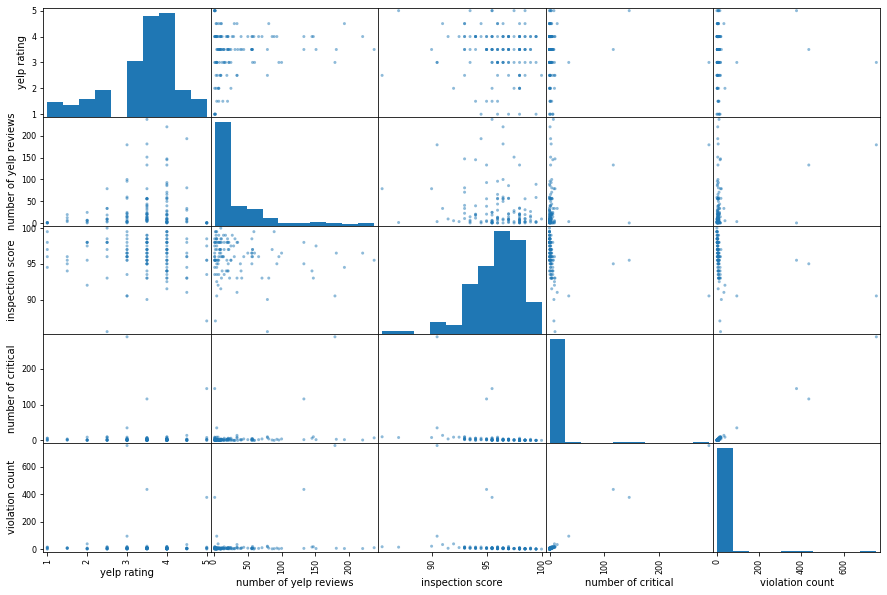

In [15]:
#creates a scatter plot matrix for recent_df
pd.plotting.scatter_matrix(recent_df[['yelp rating','number of yelp reviews','inspection score','number of critical','violation count']], 
                           figsize=(15, 10));

Figure 1: Scatterplot matrix of columns in recent_df 

Seeing the max values for violation count and number of critical violation and looking at the scatter plots, I noticed outliers of really high values for number of critical and violation count. So I check that there isn't any problems with the dataset. 

In [16]:
#check maximum value of number of critical violations column
print(recent_df.loc[recent_df['number of critical'].idxmax()])

#check if there are only 1s in violation count column
print()
print('check counts')
print(all_df['violation count'].unique())

#check if there are not very large numbers in critical violation?
print()
print('check counts')
print(restaurant_df['critical violation?'].unique())
print()

#count inspections at red monkey tavern 
print(all_df.loc[all_df['name'] == 'red monkey tavern'].count())

name                      red monkey tavern
yelp rating                               3
number of yelp reviews                  179
inspection score                       90.5
number of critical                      290
days open                              4603
violation count                         754
Name: (4092013869, 2016-03-15), dtype: object

check counts
[1]

check counts
[  3.   4.   2.   1.   6.   5.   8.  10.   0.   7.   9.  11.  15. 232.
 145.  58.  87. 116.  20.  13.  24. 290.  29.  14.  12.  33.  27.  32.
  34.  22.  28.  44.  36.  16.  51.  18.  35.]

id                          309
name                        309
yelp rating                 309
number of yelp reviews      309
inspection score            309
category of violation       309
critical violation?         309
violation code              309
severity                    309
point value of violation    309
description                 309
comments                    309
days open                   309
date of 

Although the data seems fine, I want to make a note of this because there might be problems with the dataset that I overlooked and these outliers may skew the data.

Text(0, 0.5, 'frequency')

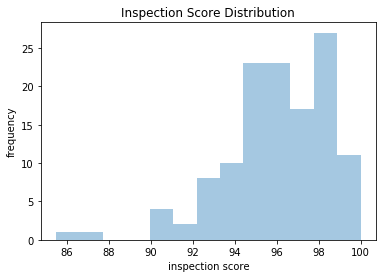

In [17]:
ax = sns.distplot(recent_df['inspection score'], kde=False)
ax.set_title('Inspection Score Distribution')
ax.set_ylabel('frequency')

Figure 2: Inspection score are out of a possible 100 points. 90 and above is an A rating and 80-89 is a B rating. A majority of restaurants in dataset have an A rating.

Text(0, 0.5, 'frequency')

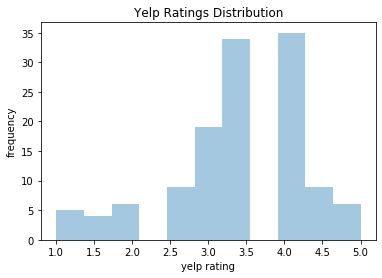

In [18]:
ax = sns.distplot(recent_df['yelp rating'], kde=False)
ax.set_title('Yelp Ratings Distribution')
ax.set_ylabel('frequency')

Figure 3: On yelp users are able to rate restaurants on a scale of 1 to 5 stars. Most yelp ratings seem to be from 3-4.5.

Text(0, 0.5, 'frequency')

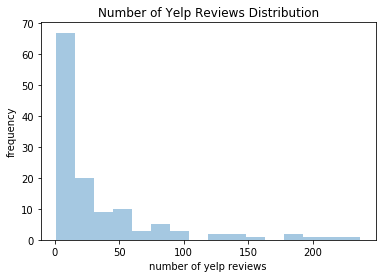

In [19]:
ax = sns.distplot(recent_df['number of yelp reviews'], kde=False)
ax.set_title('Number of Yelp Reviews Distribution')
ax.set_ylabel('frequency')

Figure 4: Most restaurants have less than 50 yelp reviews.

Text(0.5, 1.0, 'Relationship between inspection score and yelp rating')

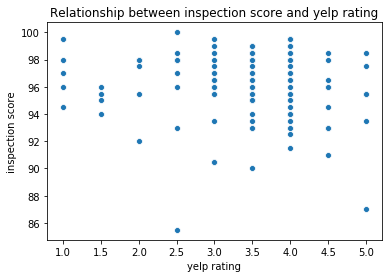

In [20]:
ax = sns.scatterplot(x='yelp rating', y='inspection score', data=recent_df)
ax.set_title('Relationship between inspection score and yelp rating')

Figure 5: Based on this scatterplot it is unclear if there is a relationship between inspection score and yelp rating.

Text(0.5, 1.0, 'Relationship between inspection score and yelp rating')

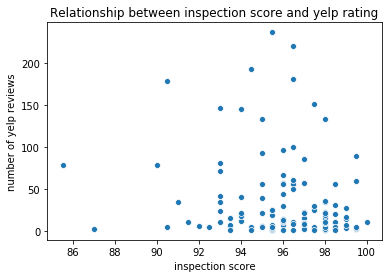

In [21]:
ax = sns.scatterplot(x='inspection score', y='number of yelp reviews', data=recent_df)
ax.set_title('Relationship between inspection score and yelp rating')

Figure 6: Based on this scatterplot it is unclear if there is a relationship between inspection score and number of yelp reviews.

Text(0.5, 1.0, 'Relationship between yelp review count and number of critical violations')

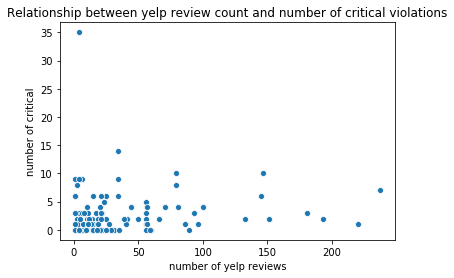

In [22]:
#remove outliers to better visualize 
#note the outlier is only removed for the visual below
df = recent_df[recent_df['number of critical'] < 50]

ax = sns.scatterplot(x='number of yelp reviews', y='number of critical', data=df)
ax.set_title('Relationship between yelp review count and number of critical violations')

Figure 7: The above graph is to show the relationship between the number of critical violations of committed by the restaurant and the number of yelp reviews.

### Linear Regression

To identify the relationship between yelp ratings and review count and inspection scores I'm going to be using a linear regression model to find the best fit line.

#### Linear Regression Model for Yelp Rating

In [23]:
#rename columns to be able to create linear regression model
recent_df.rename(columns={'yelp rating':'yelp_rating'}, inplace=True)
recent_df.rename(columns={'inspection score':'inspect_score'}, inplace=True)

#create model
outcome, predictors = patsy.dmatrices('inspect_score ~ yelp_rating', recent_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          inspect_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.149
Date:                Wed, 10 Jun 2020   Prob (F-statistic):              0.286
Time:                        07:21:30   Log-Likelihood:                -293.76
No. Observations:                 127   AIC:                             591.5
Df Residuals:                     125   BIC:                             597.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      96.9183      0.849    114.195      

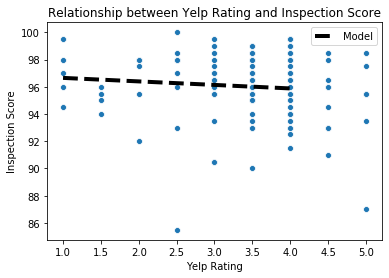

In [24]:
#plot original data
sns.scatterplot(x='yelp_rating', y='inspect_score', data=recent_df)

#generate model fit line
xs = np.arange(recent_df['yelp_rating'].min(), recent_df['yelp_rating'].max())
ys = -0.2584 * xs + 96.9183
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Yelp Rating')
plt.ylabel('Inspection Score')
plt.title('Relationship between Yelp Rating and Inspection Score')
plt.legend();

Figure 8: The line generated from the linear regression model suggests there may be a slight negative correlation between the inspection score and yelp rating. The lower the inspection score, the higher the yelp rating.

#### Linear Regression Model for Number of Yelp Reviews

In [25]:
#rename columns to be able to create linear regression model
recent_df.rename(columns={'number of yelp reviews':'yelp_review_num'}, inplace=True)

#create model
outcome, predictors = patsy.dmatrices('inspect_score ~ yelp_review_num', recent_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          inspect_score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.714
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0562
Time:                        07:21:31   Log-Likelihood:                -292.48
No. Observations:                 127   AIC:                             589.0
Df Residuals:                     125   BIC:                             594.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          96.3389      0.267    3

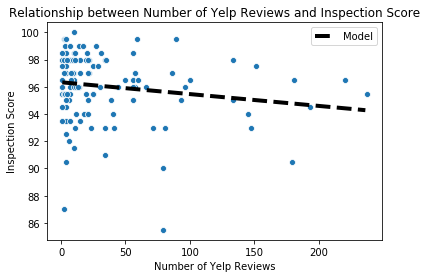

In [26]:
#plot original data
sns.scatterplot(x='yelp_review_num', y='inspect_score', data=recent_df)

#generate model fit line
xs = np.arange(recent_df['yelp_review_num'].min(), recent_df['yelp_review_num'].max())
ys = -0.0087 * xs + 96.3389
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Number of Yelp Reviews')
plt.ylabel('Inspection Score')
plt.title('Relationship between Number of Yelp Reviews and Inspection Score')
plt.legend();

Figure 9: The line generated from the linear regression model suggests there may be a slight negative correlation between the inspection score and number of yelp reviews. The more yelp reviews, the lower the inspection score.

# Ethics & Privacy

The dataset was given for use in the final project, so I had permission to use the dataset for this purpose. Although I am not entirely certain of the exact source of the dataset, to my knowledge health inspsection data is typically available for the public to view and all the information regarding yelp rating and reviews of the restaurants that are in the yelp dataset is accessible to the public via yelp's website.

Although the health inspection data is accessible to the public, one area to be concerned about privacy is the information identifying the people that inspected the restaurant. Information regarding the inspectors was removed early on out of concern for privacy and because the information was not necessary for the analysis. Another potential area for concern would be the privacy of the person rating the restaurant on yelp. However, this is not problem for this analysis as the names of the people rating the restaurant on yelp were not attached to the dataset and there is no way in this analysis to identify the users contributing to that yelp rating.

There is potential for bias in how it was collected. The health inspection data is based on an health inspectors' observations, so the recorded observations are subject to human error. There is also potential for bias in yelp reviews. Yelp reviews are not representative of the entire population because some people might have an opinion on a restaurant, but not review it. Therefore, whether a person is more likely to write a review online might bias the yelp dataset. While these biases are unavoidable, it is important to note their potential to influence the data.  

One possible unintended consequence of this analysis could be emphasizing negative qualities of an individual restaurant. Even though the data concerning the cleanliness and safety of a restaurant is already public record, the data could highlight health violations of several restaurants. But this consequence may be unavoidable considering the research questions seeks to understand health inspection scores and food safety.

In terms of accuracy of the data, it is important to note that because the dataset was provided to me for the final project, I am not entirely sure where the data came from and do not have a complete understanding of the dataset. As a result, I may have overlooked certain aspects of the data imperative to analyzing and understanding the data. 

# Conclusion & Discussion

In this project, I intended to find the relationship between yelp ratings and the number of yelp reviews and inspection scores to see if yelp information might be able to provide us information related to health inspection scores. I merged the health inspection datasets and yelp dataset and took the most recent health inspection inforamtion to be able to look at the yelp scores side to side with the health inspection scores. Next, I plotted the relationship between yelp scores and health inspection scores and yelp reviews counts and health inspection scores. Finally, I created a best fit line using linear regression to better visualize their correlation. Based on the results, I found there to be a negative correlation between yelp score and inspection score and a negative correlation between yelp review count and inspection score for restaurants in North Carolina, showing one part of my hypothesis to be incorrect and the other correct. I thought that a higher inspection score would correlate with a higher yelp rating, but the data showed that lower yelp ratings were correlated with a higher inspection score. But I correctly predicted that restaurants with a higher quantity of yelp reviews would have a lower inspection score. 

There were several limitations to this project. First the use of a simple linear regression model may not have been the best approach to analyzing the data. Given more time I would have liked to explore other models that better account for other variables. Another limitation was that health inspection scores may not be the best indication of a restaurant's cleanliness. A majority of restaurants are given an A rating, so there is little variation in restaurants' inspection score. Another limitation is the dataset. Because the dataset was provided for me, I have a limited understanding of it. For example, I did not understand all of the column headers' meaning. As a result, I may have overlooked data points that would have been helpful for answering my research question. Another limitation to the project in regards to the dataset was the use of outdated information. The inspection dates only went up to 2016 and there is no date attached to the yelp data, so the yelp ratings may not have been entirely reflective of the inspection scores. There are most likely many restaurants in NC excluded entirely from the dataset due to the lack of recent data. Another limitation is that the data only included restaurants in North Carolina, so the results could not be applied nationally. It could only be used to represent restaurants in North Carolina.   

This project may help to provide further insight into the relationship between health inspections and online reviews. It could help inform state and local officials concerned with improving health inspecions that how data from online restaurant reviews might provide valuable information related to a restaurants' sanitary conditions. 